In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import newton

In [16]:
f = lambda s,y,F,A,lam,t=0: lam*y + A*np.cos(2*np.pi*F*(t+s))

In [85]:
reltol = 1e-8
abstol = np.array([1e-6])
F = 100.
A = 1000.
lam = -5.
T = 1./F
H = 10*T
tend = 200.*T
dt = T/100.
ttran = 0*T
y0 = np.array([10])
transient = solve_ivp(lambda t,y: f(t,y,F,A,lam),[0,ttran],y0,method='BDF',rtol=reltol,atol=abstol)
ytilde0 = np.array([transient['y'][0][-1]])
y0 = np.array([transient['y'][0][-1]])
ref = solve_ivp(lambda t,y: f(t,y,F,A,lam),[ttran,tend],y0,method='BDF',rtol=reltol,atol=abstol)
tz = [0]
z = [y0[0]]
t = ttran
ttilde = np.array([])
ytilde = np.array([])
while t < tend:
    ytil = solve_ivp(lambda s,y: f(s,y,F,A,lam,t),[0,T],ytilde0,method='BDF',rtol=reltol,atol=abstol)
    #x = np.array([ytil['t'][i] for i in 0,-1])
    y = np.array([ytil['y'][0][i] for i in 0,-1])
    ttilde = np.concatenate((ttilde,t+ytil['t']))
    ytilde = np.concatenate((ytilde,ytil['y'][0]))
    g = 1./T * (y[1]-y[0])
    tz.append(t+H)
    z.append(z[-1]+H*g)
    ytilde0 = np.array([z[-1]])
    t += H

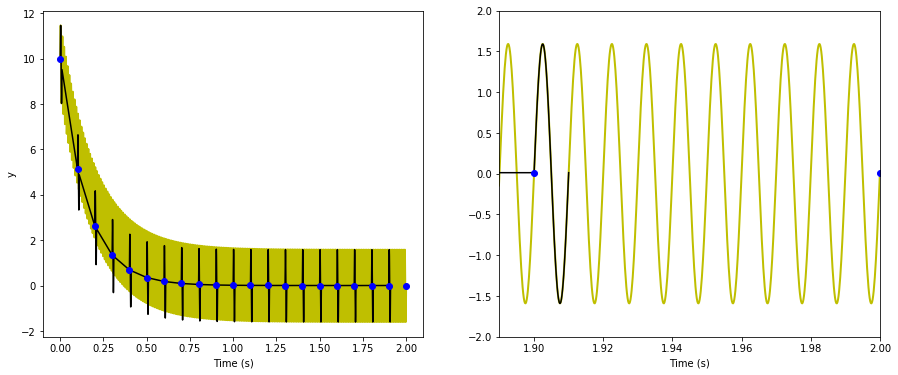

In [91]:
plt.figure(figsize=(15,6))
for i in range(1,3):
    plt.subplot(1,2,i)
    plt.plot(ref['t'],ref['y'][0],'y',lw=2)
    plt.plot(ttilde,ytilde,'k')
    plt.plot(tz,z,'bo')
    plt.xlabel('Time (s)')
    if i == 1:
        plt.ylabel('y')
    if i == 2:
        plt.axis([tend-H-T,tend,-2,2])
plt.show()